# This code plots scaling relationships of source to sink systems

Nyberg et al., 2018 https://doi.org/10.1016/j.sedgeo.2018.06.007 | https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/ETH8VN

Sømme et al., 2009 https://doi.org/10.1111/j.1365-2117.2009.00397.x

Blum et al., 2013 https://doi.org/10.1016/j.earscirev.2012.09.003

In [1]:
#The thing with the Bjorn dataset is that it doesn't have any river names. 
#I think that he ran a hydroanalysis in the srtm data and that's why he only included the FIDs
#The FIDs of the cross sections don't match the FID's of the dataset, which is a pain!
#One way to solve the problem is to click on the catchment in QGis and get the data and then plot it in python
#which is ridiculous but might be the best wat to do it

#The other thing to do is to plot R length vs shelf width, which I don't know if Nyberg did already

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from scipy.optimize import*
from numpy import*


In [3]:
Nyberg_Qs1MT_yr=pd.read_table('./Nyberg_Qs>1MT_yr_v2.csv',  header=0, sep=",")
df = pd.DataFrame(Nyberg_Qs1MT_yr, columns = Nyberg_Qs1MT_yr.columns)#Still don't understand why I have to convert Nyberg into dataframe but it works 
Shelf_widths=pd.read_table('./Shelf_widths.csv', header=0, sep="\t")
Somme=pd.read_table('./Somme_etal_2009.csv', header=0, sep=",")

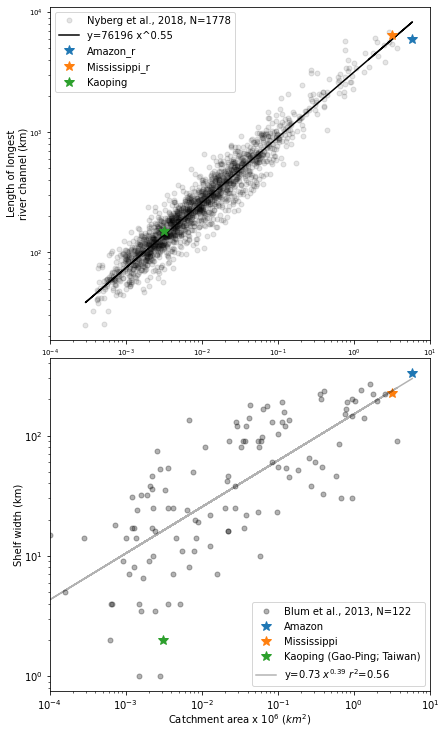

In [4]:
#figsize=(1.57,1.18)# This size is in inches
ms=5
plt.figure(figsize=(6,10))
plt.rc("font", size=10)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

m, c=np.polyfit(log(df.Area/1e6), log(df.C_W_Length/1e3), 1) # getting the intercept and the slope
y_fit = np.exp(m*log(df.Area/1e6) + c) # calculate the fitted values of y 
# #Somme
x=Somme['Catchment area\n(× 106 km2)']
y=Somme['Length of longest\nriver channel (km)']
x.nna=x[~np.isnan(x)]#;print x.nna
y.nna=y[~np.isnan(y)]#; print y.nna
x=np.array(x.nna)
y=np.array(y.nna)
mS, cS=np.polyfit(log(x), log(y), 1) # getting the intercept and the slope
y_fit_S= np.exp(mS*log(x) + cS) # calculate the fitted values of y 

#Plot 1
plt.subplot(2, 1, 1)
plt.loglog(df.Area/1e6,df.C_W_Length/1e3,'bo', markersize=ms, c=(0,0,0,.1), label='Nyberg et al., 2018, N=1778')

plt.plot(df.Area/1e6, y_fit, 'k', label='y=76196 x^0.55')

#plt.xlabel('Catchment area($10^6$ $km^2$)', labelpad=0.001)
plt.ylabel('Length of longest\nriver channel (km)', labelpad=0.001)
#plt.legend(loc=0)
plt.tight_layout(pad=.0)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.xlim(1e-4, 1e1)

Rivers=['Amazon_r', 'Mississippi_r', 'Kaoping']
for i in Rivers:
    plt.loglog(df.Area[df.River_Name==i]/1e6,df.C_W_Length[df.River_Name==i]/1e3,'*', label=i, markersize=10)
plt.legend()
#plot 2
plt.subplot(2, 1, 2)
#plt.loglog(df.Area/1e6,df.S_Dist/1e3,'bo', c=(0,0,0,.2), label='Nyberg et al., 2018, N='+str(len(df.Area)))
plt.loglog(Shelf_widths.Area_km2/1e6, Shelf_widths.Width_km,'o', markersize=ms, c=(0,0,0,.3),
           label='Blum et al., 2013, N='+str(len(Shelf_widths.Area_km2)))
Rivers_s=['Amazon', 'Mississippi', 'Kaoping (Gao‐Ping; Taiwan)']
for i in Rivers_s:
    plt.loglog(Shelf_widths.Area_km2[Shelf_widths.River==i]/1e6,Shelf_widths.Width_km[Shelf_widths.River==i],'*', label=i,  markersize=10)



mSW, cSW=np.polyfit(log(Shelf_widths.Area_km2/1e6), log(Shelf_widths.Width_km), 1) # getting the intercept and the slope
y_fit_SW = np.exp(mSW*log(Shelf_widths.Area_km2/1e6) + cSW) # calculate the fitted values of y 
plt.plot(Shelf_widths.Area_km2/1e6, y_fit_SW, label='y=0.73 $x^{0.39}$ $r^2$=0.56', c=(0,0,0,.3))
#plt.plot(area/1e6, mean(SB.X-metrics.X)/1e3, '*', color='r')
t=50
plt.xlim(1e-4, 1e1)
plt.xlabel('Catchment area x $10^6$ ($km^2$)', labelpad=0.001)
plt.ylabel('Shelf width (km)', labelpad=0.001)
plt.tight_layout(pad=.0)
plt.legend()
# plt.savefig("./S2S_relationships.jpg", dpi=300)